## Empresa: Concreteira LTDA
- Faturamento 2020: $ 4.500.000,00 <br>
- Faturamento 2021: $ 4.850.000,00 <br>
- Faturamento 2022: $ 3.800.000,00 <br>
- Faturamento 2023: $ 4.000.500,00 <br>
- Faturamento 2024: $ 4.500.000,00 <br>

Custo médio total: 80% do faturamento de cada ano, sendo:
- Cimento: 45% dos custos 
- Areia: 15% dos custos 
- Brita 0: 7,50% dos custos 
- Brita 1: 7,50% dos custos 
- Manutenção: 5% dos custos 
- Combustivel: 5% dos custos 
- Aditivos, águas e outros custos diversos: 5% dos custos 
- Folha de pagamento e proventos: 10% dos custos

Lucro Bruto: 20% do faturamento
Tributos:
- 5% do faturamento - 40% de abatimento
- PIS e COFINS não cumulativos, podendo abater credito total dos custos com cimento, brita 0, brita 1, aditivos, águas e outros custos, manutenção e combustível
- IRPJ e CSLL pelo lucro real, descontando todo o custo.

In [ ]:
import pandas as pd

# Dados iniciais
anos = [2020, 2021, 2022, 2023, 2024]
faturamento = [4_500_000, 4_850_000, 3_800_000, 4_000_500, 4_500_000]
custo_total = [f * 0.8 for f in faturamento]
lucro_bruto = [f * 0.2 for f in faturamento]

# Cálculo dos tributos já considerados no DataFrame
tributos = {
    'ISS': [f * 0.05 * 0.6 for f in faturamento],
    'PIS': [],
    'COFINS': [],
    'IRPJ': [],
    'CSLL': []
}

# Créditos PIS/COFINS (cimento, brita_0, brita_1, manutenção, combustível, aditivos)
pct_custos = {'Cimento':0.45,'Brita_0':0.075,'Brita_1':0.075,'Manutenção':0.05,'Combustível':0.05,'Aditivos_Água_Outros':0.05}
custos = {cat: [ct * pct for ct in custo_total] for cat,pct in pct_custos.items()}
custo_credito = [sum(custos[cat][i] for cat in custos) for i in range(len(anos))]

# PIS e COFINS
pis_rate, cofins_rate = 0.0165, 0.076
tributos['PIS'] = [pis_rate * max(f - c, 0) for f, c in zip(faturamento, custo_credito)]
tributos['COFINS'] = [cofins_rate * max(f - c, 0) for f, c in zip(faturamento, custo_credito)]

# IRPJ (15% + adicional 10% sobre o que exceder 240k) e CSLL (9%)
tributos['IRPJ'] = [lb * 0.15 + max(lb - 240_000, 0) * 0.10 for lb in lucro_bruto]
tributos['CSLL'] = [lb * 0.09 for lb in lucro_bruto]

# Monta DataFrame
df = pd.DataFrame({
    'Ano': anos,
    'Faturamento': faturamento,
    'Custo_Total': custo_total,
    'Lucro_Bruto': lucro_bruto,
    **tributos
})

# Cálculo do Lucro Líquido
tax_cols = ['ISS','PIS','COFINS','IRPJ','CSLL']
df['Lucro_Líquido'] = df['Lucro_Bruto'] - df[tax_cols].sum(axis=1)


# Exibe resultado
display(df[['Ano','Faturamento','Lucro_Bruto','Lucro_Líquido']])



{'ISS': [135000.0, 145500.0, 114000.0, 120015.0, 135000.0], 'PIS': [29700.0, 32010.0, 25080.0, 26403.300000000003, 29700.0], 'COFINS': [136800.0, 147440.0, 115520.0, 121615.2, 136800.0], 'IRPJ': [201000.0, 218500.0, 166000.0, 176025.0, 201000.0], 'CSLL': [81000.0, 87300.0, 68400.0, 72009.0, 81000.0]}


,Ano,Faturamento,Lucro_Bruto,Lucro_Líquido
0,2020,4500000,900000.0,316500.0
1,2021,4850000,970000.0,339250.0
2,2022,3800000,760000.0,271000.0
3,2023,4000500,800100.0,284032.5
4,2024,4500000,900000.0,316500.0


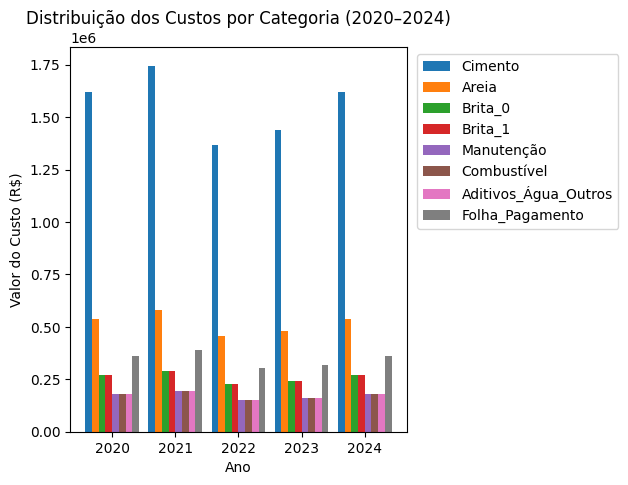

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo (mesmos usados anteriormente)
anos = [2020, 2021, 2022, 2023, 2024]
faturamento = [4_500_000, 4_850_000, 3_800_000, 4_000_500, 4_500_000]
custo_total = [f * 0.8 for f in faturamento]

# Proporções de custo
pct = {
    'Cimento': 0.45,
    'Areia': 0.15,
    'Brita_0': 0.075,
    'Brita_1': 0.075,
    'Manutenção': 0.05,
    'Combustível': 0.05,
    'Aditivos_Água_Outros': 0.05,
    'Folha_Pagamento': 0.10
}

# Monta DataFrame de custos
df_costs = pd.DataFrame({
    cat: [ct * p for ct in custo_total]
    for cat, p in pct.items()
}, index=anos)
df_costs.index.name = 'Ano'

# Gráfico de barras agrupadas
x = np.arange(len(df_costs.index))
n = len(df_costs.columns)
width = 0.85 / n  # largura das barras

plt.figure()
for i, col in enumerate(df_costs.columns):
    plt.bar(x + i*width, df_costs[col], width, label=col)

plt.xticks(x + width*(n-1)/2, df_costs.index)
plt.xlabel('Ano')
plt.ylabel('Valor do Custo (R$)')
plt.title('Distribuição dos Custos por Categoria (2020–2024)')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [31]:
df = pd.DataFrame({
    'Ano': anos,
    'Faturamento': faturamento,
    'Custo_Total': custo_total,
    'Lucro_Bruto': lucro_bruto,
})

# acrescenta custos por categoria
for cat, p in pct.items():
    df[cat] = df['Custo_Total'] * p

# Classificação de custos
custos_variaveis = ['Cimento', 'Areia', 'Brita_0', 'Brita_1', 'Combustível', 'Aditivos_Água_Outros']
custos_fixos = ['Manutenção', 'Folha_Pagamento']

# Cálculo de custos variáveis e fixos totais
df['Custo_Variavel_Total'] = df[custos_variaveis].sum(axis=1)
df['Custo_Fixo_Total'] = df[custos_fixos].sum(axis=1)

# Margem de Contribuição (MC) em valor e percentual
df['Margem_Contribuicao_Valor'] = df['Faturamento'] - df['Custo_Variavel_Total']
df['Margem_Contribuicao_Pct'] = df['Margem_Contribuicao_Valor'] / df['Faturamento']

# Ponto de Equilíbrio em receita (R$) e em % do faturamento
df['PE_Receita'] = df['Custo_Fixo_Total'] / df['Margem_Contribuicao_Pct']
df['PE_Pct_Faturamento'] = df['PE_Receita'] / df['Faturamento']

# Exibição dos resultados
output = df[['Ano', 'Faturamento', 'Custo_Variavel_Total', 'Custo_Fixo_Total', 
             'Margem_Contribuicao_Valor', 'Margem_Contribuicao_Pct', 
             'PE_Receita', 'PE_Pct_Faturamento']]

print(output.to_string(index=False))

 Ano  Faturamento  Custo_Variavel_Total  Custo_Fixo_Total  Margem_Contribuicao_Valor  Margem_Contribuicao_Pct  PE_Receita  PE_Pct_Faturamento
2020      4500000             3060000.0          540000.0                  1440000.0                     0.32   1687500.0               0.375
2021      4850000             3298000.0          582000.0                  1552000.0                     0.32   1818750.0               0.375
2022      3800000             2584000.0          456000.0                  1216000.0                     0.32   1425000.0               0.375
2023      4000500             2720340.0          480060.0                  1280160.0                     0.32   1500187.5               0.375
2024      4500000             3060000.0          540000.0                  1440000.0                     0.32   1687500.0               0.375
